<center><h1>Developing Differently</h1></center>
<center><h1>with</h1></center>
![alt text](https://datascienceinsider.files.wordpress.com/2015/12/jupyter-logo.png)

## What are Notebooks?
* Somewhere between an ***IDE*** and an ***Interpreter***
* Repeatable, interactive & visual
* Self supporting documentation
* Language Agnostic


## Main features of the web application

 - In-browser editing for code, with automatic syntax highlighting, indentation, and tab completion / introspection.
 
 - The ability to execute code from the browser, with the results of computations attached to the code which generated them.
 - Displaying the result of computation using rich media representations, such as HTML, LaTeX, PNG, SVG, etc. For example, publication-quality figures rendered by the matplotlib library, can be included inline.
 
 - In-browser editing for rich text using the Markdown markup language, which can provide commentary for the code, is not limited to plain text.
 
 - The ability to easily include mathematical notation within markdown cells using LaTeX, and rendered natively by MathJax.
 
 - There are four types of cells: code cells, markdown cells, raw cells and heading cells.

![alt text](./images/arch.png)

# Where do Notebooks get used?
* Data Analytics
    * Interative
    * Visual
    * Connect to distributed computing resources
* Education
    * Descriptive
    * Example => Results
    * Modular, not monolithic
* Presentations
    * Easy to format
    * Run code live (& test before hand)

![alt text](./images/workflow.png)

# Exploratory Data Analysis

>**In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.**

### Getting started...
* What do I have to work with?

In [37]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 58A9-006C

 Directory of C:\Users\G540924\Desktop\GitHub\cc7_jupyter_nb

07/28/2016  04:40 PM    <DIR>          .
07/28/2016  04:40 PM    <DIR>          ..
07/28/2016  03:57 PM                84 .gitignore
07/26/2016  10:04 AM    <DIR>          .ipynb_checkpoints
07/28/2016  03:53 PM           121,781 arch.vsdx
07/27/2016  12:49 PM    <DIR>          data
07/28/2016  04:08 PM    <DIR>          images
07/28/2016  04:40 PM            16,436 Presentation.ipynb
07/26/2016  09:59 AM                57 README.md
07/28/2016  02:11 PM            75,958 workflow.vsdx
               5 File(s)        214,316 bytes
               5 Dir(s)  50,981,072,896 bytes free


**Other CLI Stuff**
* Run other scripts with %run
* Execute OS specific commands with !*my_cool_cmd*

In [38]:
import pandas as pd
df = pd.read_csv('./data/college.csv')
df.columns

Index(['Expenditure', 'Income', 'region', 'year'], dtype='object')

* **What's going on above?**
    * Import Python Data Analysis Library - Pandas
    * Read the csv file into memory
    * Display the columns back in nice format

* **Try it**
    * What's the difference between `print(df.head())` and `df.head()`?
    * What does `;` at the end of a cell do?

In [39]:
df.head()

,Expenditure,Income,region,year
0,115.72,2726.4,A,2013
1,130.60,3770.0,A,2013
2,172.80,3490.0,A,2013
3,135.60,4788.0,A,2013
4,128.80,3932.0,A,2013


In [40]:
df.describe()

,Expenditure,Income,year
count,150.000000,150.000000,150.000000
mean,166.444800,3813.677333,2014.000000
std,62.620749,1037.975873,0.819232
min,55.000000,1602.000000,2013.000000
25%,117.610000,3088.000000,2013.000000
50%,161.300000,3836.000000,2014.000000
75%,215.390000,4436.500000,2015.000000
max,326.000000,6484.000000,2015.000000


* **What's going on above?**
    * Get Summary Statistics
    * Region is not present because it is not numerical
    * Year is being summarized because it is being treated numerically

* **Try it**
    * Change Year to be a Categorical variable
        * `df['year'] = df['year'].astype('category')`
    * What is `df`?
        * `?df`

In [41]:
??df

In [42]:
avg_df = df.groupby(['region']).mean()
avg_df.head()

,Expenditure,Income,year
region,,,
A,173.056296,4495.866667,2014
B,157.140000,4049.177778,2014
C,126.760000,2967.016667,2014
D,219.299487,4166.051282,2014


* **What's going on above?**
    * Aggregating data by the Region and then taking the average

* **Try it**
    * Rename Columns so we know they are averages
        * `avg_df = avg_df.rename(columns={'Expenditure': 'Avg_Exp', 'Income': 'Avg_Income'})`
    * How many records are there for each year?

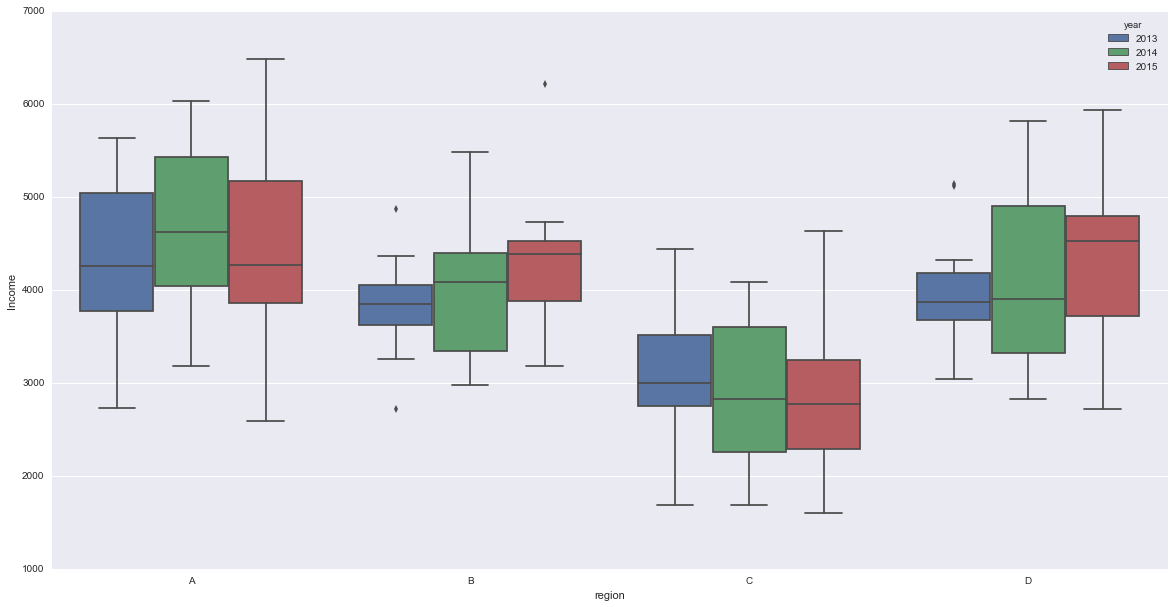

In [43]:
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import seaborn as sns

ax = sns.boxplot(x="region", y="Income", hue="year", data=df)

* **What's going on above?**
    * Use the magic function to plot inline
    * Set the plot size (so it presents well)
    * Import statiscal visualization library - Seaborn
    * Box plot expenidures by its categorical variables

* **Try it**
    * Look at incomes

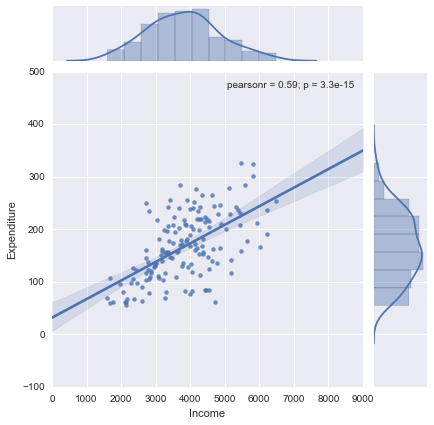

In [44]:
ax = sns.jointplot(x="Income", y="Expenditure", data=df, kind="reg")

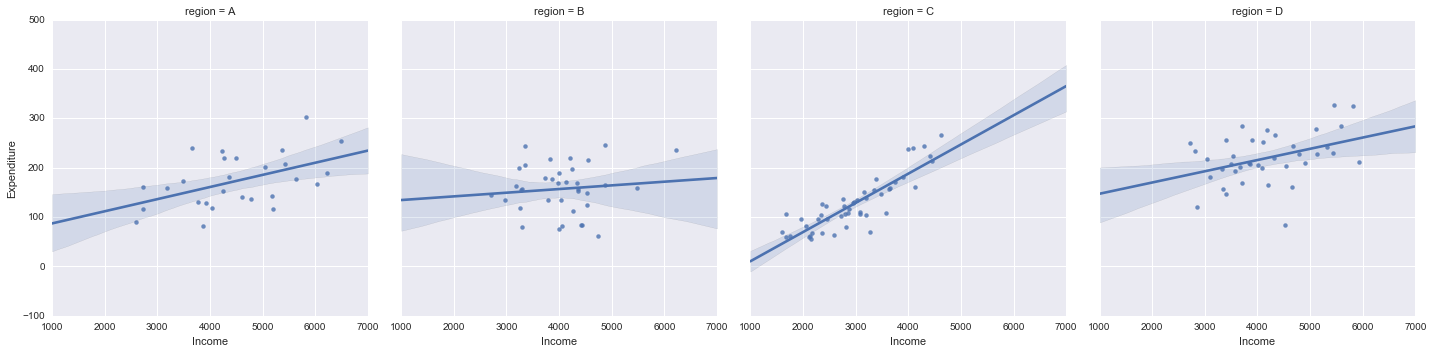

In [45]:
ax = sns.lmplot(x="Income", y="Expenditure", col="region", data=df)

In [46]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

formula = 'Expenditure~region+year+region*year'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
aov_table

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
region,188842.575388,3.0,23.262950,2.622251e-12,0.323204,0.307885
year,2006.323264,1.0,0.741459,3.906456e-01,0.003434,-0.001192
region:year,9193.792818,3.0,1.132556,3.380969e-01,0.015735,0.001833
Residual,384239.687537,142.0,NaN,NaN,NaN,NaN


* **What's going on above?**
    * Importing libraries
    * Defining functions
    * Performing ANOVA

We start with some brief introduction on theory of ANOVA. If you are more interested in the four methods to carry out one-way ANOVA with Python click here. ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. Variance in the ANOVA is partitioned in to total variance, variance due to groups, and variance due to individual differences.


<img src ="./images/python_anova_theory_partitioning_of_variance.gif" style="width: 200px;"/>
<center>Partioning of Variance in the ANOVA. SS stands for Sum of Squares.</Center>
<br>

The ratio obtained when doing this comparison is known as the F-ratio. A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design. The general form of the model, which is a regression model for a categorical factor with J levels, is:

<br>
<center>$y_i = b_0+b_1X_{1,i} +...+b_{j-1,i} + e_i$</Center>
<br>

There is a more elegant way to parametrize the model. In this way the group means are represented as deviations from the grand mean by grouping their coefficients under a single term.  I will not go into detail on this equation:

<br>
<center>$y_{ij} = \mu_{grand} + \tau_j + \varepsilon_{ij}$</center>
<br>

As for all parametric tests the data need to be normally distributed (each groups data should be roughly normally distributed) for the F-statistic to be reliable. Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.



* **What's going on above?**
    * We can use Markdown, HTML and Latex to have rich documentation!